# Portrait

## Index
1. Loading Library
2. Getting Images
3. Downloading Model
3. Segmentation
4. Blur

## Loading Library

In [27]:
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

import urllib
from pixellib.semantic import semantic_segmentation

import copy

## Getting Images

In [2]:
# Label of Image
ls = ['winter', 'karina', 'iu']

In [3]:
# Load JPEG Image
path = os.getenv("HOME") + '/aiffel/Ex/Ex-10/'
items = os.listdir(path)
path_img = [path + img for img in items if '.jpeg' in img]
path_img

['/aiffel/aiffel/Ex/Ex-10/img1.jpeg',
 '/aiffel/aiffel/Ex/Ex-10/img2.jpeg',
 '/aiffel/aiffel/Ex/Ex-10/img3.jpeg']

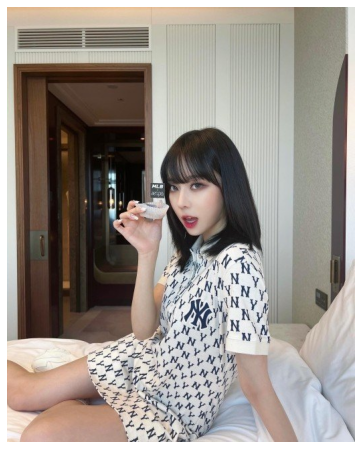

In [4]:
ls_img = [cv2.imread(img) for img in path_img]

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(ls_img[0], cv2.COLOR_BGR2RGB))
plt.axis(False)
plt.show()

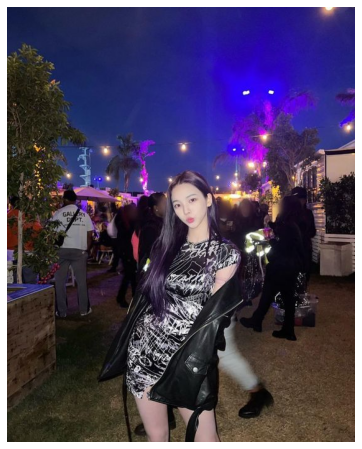

In [5]:
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(ls_img[1], cv2.COLOR_BGR2RGB))
plt.axis(False)
plt.show()

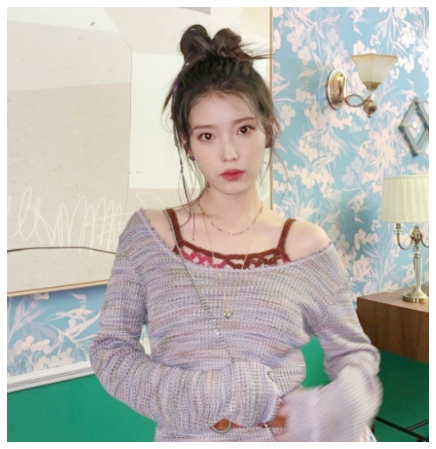

In [6]:
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(ls_img[2], cv2.COLOR_BGR2RGB))
plt.axis(False)
plt.show()

## Downloading Model

In [7]:
# Download Model from url
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f6802acf6d0>)

In [8]:
# Take a pre-trained Model 
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

## Segmentation

In [9]:
segvalues, output = [], []

for img in path_img:
     tmp = model.segmentAsPascalvoc(img)
     segvalues.append(tmp[0])
     output.append(tmp[1])

In [10]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

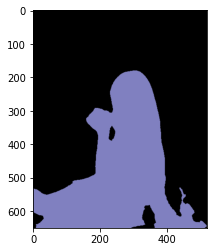

In [11]:
plt.imshow(output[0])
plt.show()

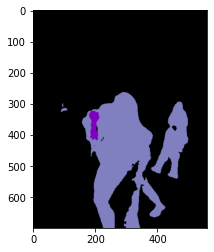

In [12]:
plt.imshow(output[1])
plt.show()

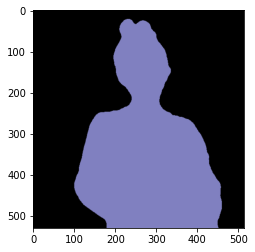

In [13]:
plt.imshow(output[2])
plt.show()

In [14]:
segvalues[0]

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [15]:
dir(model)

['FROZEN_GRAPH_NAME',
 'INPUT_SIZE',
 'INPUT_TENSOR_NAME',
 'OUTPUT_TENSOR_NAME',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'load_ade20k_model',
 'load_pascalvoc_model',
 'model',
 'model2',
 'model_type',
 'process_camera_ade20k',
 'process_camera_pascalvoc',
 'process_video_ade20k',
 'process_video_pascalvoc',
 'segmentAsAde20k',
 'segmentAsPascalvoc',
 'segmentFrameAsAde20k',
 'segmentFrameAsPascalvoc']

In [16]:
for yo, seg in zip(ls, segvalues):
    print(yo)
    print('--------------')
    for class_id in seg['class_ids']:
        print(LABEL_NAMES[class_id], ":", class_id)
    print()

winter
--------------
background : 0
person : 15

karina
--------------
background : 0
horse : 13
person : 15

iu
--------------
background : 0
person : 15



In [17]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [18]:
colormap[15]

array([192, 128, 128])

In [19]:
seg_color = (128, 128, 192)

(650, 520)


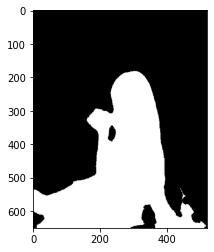

In [21]:
seg_map = np.all(output[0]==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

(700, 560)


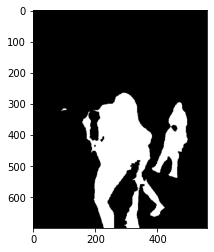

In [22]:
seg_map = np.all(output[1]==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

(530, 514)


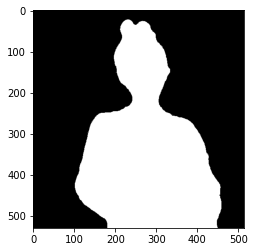

In [23]:
seg_map = np.all(output[2]==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

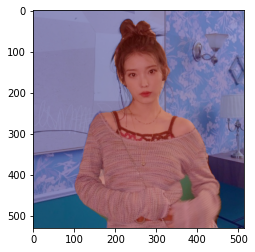

In [33]:
# it is tough work to take on segmentations of all images , do it one by one
# IU image

# Cause ls_img is list, Use Deepcopy
img_show = copy.deepcopy(ls_img)[2]
img_mask = seg_map.astype(np.uint8) * 255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## Blur

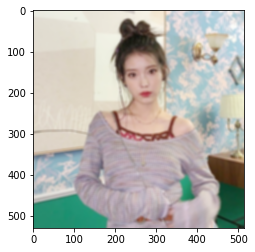

In [34]:
# Gaussian Blur
img_blur = cv2.GaussianBlur(ls_img[2], (7,7), cv2.BORDER_DEFAULT)  
plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
plt.show()

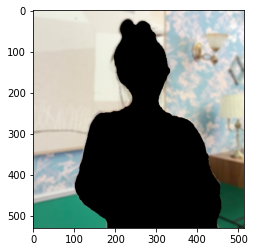

In [35]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# Extract BackGround
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_blur, img_bg_mask)

plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

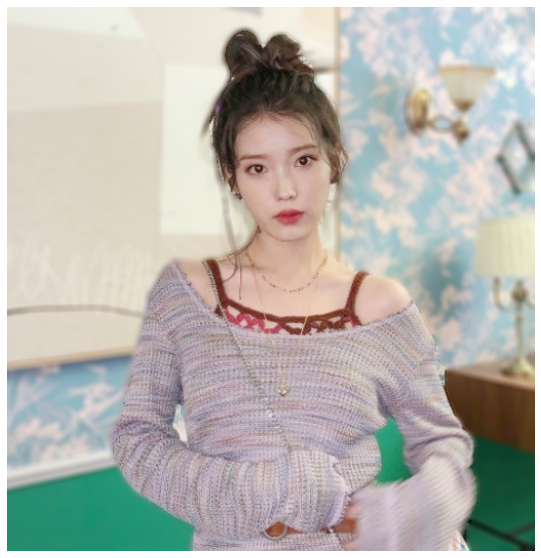

In [38]:
# 'img_mask_color==255' means a Person
img_concat = np.where(img_mask_color==255, ls_img[2], img_bg_blur)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.axis(False)
plt.show()